# **Lab 1: Linear Regression**

The lab report will be due by **Feburary 14th, 2023**. 

Please submit the ipynb file of your lab via the link in Brightspace.

##**Problem 1**
In this problem, we will explore the basic linear regression: $y_n=w_0 +w_1x_n$, where $n=1,\dots, N$ is the index of the data sample. Your task is to determine the appropriate values of $w_0$ and $w_1$ for the given data samples in Lab1_1.csv.

Requirments: 
*   You are required to use gradient descent algorithm to complete this problem.
*   You need to include the following four components in your lab report: (1) the codes, (2) the obtained appropriate value of $w_0$ and $w_1$, (3) the obtained training error, and (4) the obtained testing error. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 

# Get data
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Labs/Lab1/Lab1_1.csv')
x_data = data['x'].values
y_data = data['y'].values

# Generate training data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

In [ ]:
# Gradient-descent solution
model = models.Sequential()
model.add(layers.Normalization(input_shape=(1,), axis=None))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
# Built learning model by using gradient-descent method
adam = optimizers.Adam(learning_rate=0.5)
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

history = model.fit(x_train, y_train, epochs=2000, validation_data=(x_test, y_test))

Epoch 1/2000
5/5 [==============================] - 0s 35ms/step - loss: 4.9704 - mean_absolute_error: 4.9704 - val_loss: 5.0619 - val_mean_absolute_error: 5.0619
Epoch 2/2000
5/5 [==============================] - 0s 8ms/step - loss: 4.9654 - mean_absolute_error: 4.9654 - val_loss: 5.0570 - val_mean_absolute_error: 5.0570
Epoch 3/2000
5/5 [==============================] - 0s 7ms/step - loss: 4.9604 - mean_absolute_error: 4.9604 - val_loss: 5.0521 - val_mean_absolute_error: 5.0521
Epoch 4/2000
5/5 [==============================] - 0s 7ms/step - loss: 4.9553 - mean_absolute_error: 4.9553 - val_loss: 5.0471 - val_mean_absolute_error: 5.0471
Epoch 5/2000
5/5 [==============================] - 0s 7ms/step - loss: 4.9503 - mean_absolute_error: 4.9503 - val_loss: 5.0422 - val_mean_absolute_error: 5.0422
Epoch 6/2000
5/5 [==============================] - 0s 7ms/step - loss: 4.9453 - mean_absolute_error: 4.9453 - val_loss: 5.0372 - val_mean_absolute_error: 5.0372
Epoch 7/2000
5/5 [=========

2/2 - 0s - loss: 0.0411 - mean_absolute_error: 0.0411 - 20ms/epoch - 10ms/step
0.04113166406750679


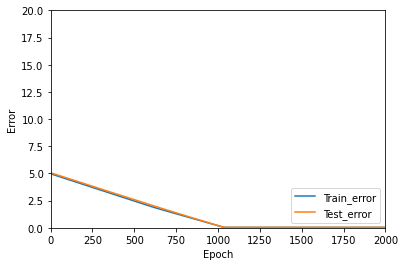

In [ ]:
# Visualize performance evaluation
plt.plot(history.history['mean_absolute_error'], label='Train_error')
plt.plot(history.history['val_mean_absolute_error'], label = 'Test_error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.xlim([0, 2000])
plt.ylim([0, 20])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

In [ ]:
# Print weight w_1 and bias w_0
W = model.layers[1].get_weights()
print(W)

[array([[-3.010088]], dtype=float32), array([5.0043936], dtype=float32)]


##**Problem 2**
In this problem, we will explore an extended linear regression: $y_n=w_0 +w_1x_n+w_2x_n^2$, where $n=1,\dots, N$ is the index of the data sample. Your task is to determine the appropriate values of $w_0$, $w_1$, and $w_2$ for the given data samples in Lab1_2.csv.

Requirments: 
*   You are required to use gradient descent algorithm to complete this problem. 
*   You need to include the following four components in your lab report: (1) the codes, (2) the obtained appropriate value of $w_0$, $w_1$, and $w_2$, (3) the obtained training error, and (4) the obtained testing error. 

In [ ]:
#Get data
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Labs/Lab1/Lab1_2.csv')
x1 = data['x'].values
x2 = np.power(x1, 2)
x_data = np.stack((x1, x2), axis = 1)
y_data = data['y'].values

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

In [ ]:
# Gradient-descent
model = models.Sequential()
model.add(layers.Normalization(input_shape=(2,), axis=None))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_7 (Normalizat  (None, 2)                3         
 ion)                                                            
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 6
Trainable params: 3
Non-trainable params: 3
_________________________________________________________________


In [ ]:
# Build learning model by using gradient-descent method
adam = optimizers.Adam(learning_rate=0.5)
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

history = model.fit(x_train, y_train, epochs=3500, validation_data=(x_test, y_test))

Streaming output truncated to the last 5000 lines.
5/5 [==============================] - 0s 15ms/step - loss: 0.8484 - mean_absolute_error: 0.8484 - val_loss: 0.8543 - val_mean_absolute_error: 0.8543
Epoch 1002/3500
5/5 [==============================] - 0s 16ms/step - loss: 0.8445 - mean_absolute_error: 0.8445 - val_loss: 0.8508 - val_mean_absolute_error: 0.8508
Epoch 1003/3500
5/5 [==============================] - 0s 18ms/step - loss: 0.8408 - mean_absolute_error: 0.8408 - val_loss: 0.8478 - val_mean_absolute_error: 0.8478
Epoch 1004/3500
5/5 [==============================] - 0s 18ms/step - loss: 0.8369 - mean_absolute_error: 0.8369 - val_loss: 0.8443 - val_mean_absolute_error: 0.8443
Epoch 1005/3500
5/5 [==============================] - 0s 18ms/step - loss: 0.8332 - mean_absolute_error: 0.8332 - val_loss: 0.8410 - val_mean_absolute_error: 0.8410
Epoch 1006/3500
5/5 [==============================] - 0s 17ms/step - loss: 0.8295 - mean_absolute_error: 0.8295 - val_loss: 0.8373 - v

2/2 - 0s - loss: 0.0121 - mean_absolute_error: 0.0121 - 35ms/epoch - 17ms/step
0.012091577053070068


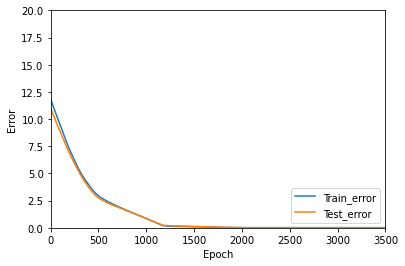

In [ ]:
# Visualize performance evaluation
plt.plot(history.history['mean_absolute_error'], label='Train_error')
plt.plot(history.history['val_mean_absolute_error'], label = 'Test_error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.xlim([0, 3500])
plt.ylim([0, 20])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

In [ ]:
# Print weight [w_1, w_2] and bias w_0
W = model.layers[1].get_weights()
print(W)

[array([[2.0107033],
       [4.9977126]], dtype=float32), array([-2.982662], dtype=float32)]


##**Problem 3**
In this problem, we will explore to use extended linear regression: $y_n=w_0 +\sum_{k=1}^Kw_kx_{n,k}$ to solve a real-world problem on stock forecasting. Your task is predict the Close value based on the Open, High, and Low values given in Lab1_3.csv.  
Requirments: 
*   You are required to use gradient descent algorithm to complete this problem. 
*   You need to include the following four components in your lab report: (1) the codes, (2) the obtained appropriate value of $w_0$, $w_1$, ..., $w_K$ , (3) the obtained training error, and (4) the obtained testing error. 

In [ ]:
# Import Data
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Labs/Lab1/Lab1_3.csv')
x_data = data[['Open','High','Low']]
y_data = data['Close']

# Generate training data 
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3) 

In [ ]:
# Gradient-descent solution
model = models.Sequential() 
model.add(layers.Normalization(input_shape=(3,), axis=None))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_8 (Normalizat  (None, 3)                3         
 ion)                                                            
                                                                 
 dense_8 (Dense)             (None, 1)                 4         
                                                                 
Total params: 7
Trainable params: 4
Non-trainable params: 3
_________________________________________________________________


In [ ]:
# Build learning model by using gradient-descent method
adam = optimizers.Adam(learning_rate=0.5)
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

history = model.fit(x_train, y_train, epochs=3500, validation_data=(x_test, y_test))

Streaming output truncated to the last 5000 lines.
6/6 [==============================] - 0s 15ms/step - loss: 7.6185 - mean_absolute_error: 7.6185 - val_loss: 7.1743 - val_mean_absolute_error: 7.1743
Epoch 1002/3500
6/6 [==============================] - 0s 15ms/step - loss: 7.7073 - mean_absolute_error: 7.7073 - val_loss: 7.1725 - val_mean_absolute_error: 7.1725
Epoch 1003/3500
6/6 [==============================] - 0s 15ms/step - loss: 7.6648 - mean_absolute_error: 7.6648 - val_loss: 7.2490 - val_mean_absolute_error: 7.2490
Epoch 1004/3500
6/6 [==============================] - 0s 15ms/step - loss: 7.6623 - mean_absolute_error: 7.6623 - val_loss: 7.1976 - val_mean_absolute_error: 7.1976
Epoch 1005/3500
6/6 [==============================] - 0s 14ms/step - loss: 7.6328 - mean_absolute_error: 7.6328 - val_loss: 7.1687 - val_mean_absolute_error: 7.1687
Epoch 1006/3500
6/6 [==============================] - 0s 17ms/step - loss: 7.6274 - mean_absolute_error: 7.6274 - val_loss: 7.1909 - v

3/3 - 0s - loss: 5.3572 - mean_absolute_error: 5.3572 - 37ms/epoch - 12ms/step
5.357196807861328


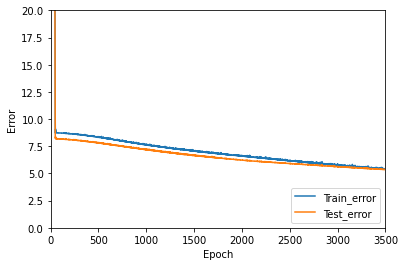

In [ ]:
# Visualize performance evaluation
plt.plot(history.history['mean_absolute_error'], label='Train_error')
plt.plot(history.history['val_mean_absolute_error'], label = 'Test_error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.xlim([0, 3500])
plt.ylim([0, 20])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

In [ ]:
# Print weight and bias
W = model.layers[1].get_weights()
print(W)

[array([[0.03631325],
       [0.13727987],
       [0.8408325 ]], dtype=float32), array([0.11936207], dtype=float32)]
